In [34]:
import pandas as pd
from SupFunctions import barplot_balance, multiclass_kde_hue, barplot_group
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loan Approval Classification Dataset
https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download

Данный датасет взят с соревновательной площадки kaggle от пользователя taweilo. Данные в свободном доступе.

Этот датасет представляет собой синтетическую версию, основанную на исходном наборе данных о кредитном риске с прошедшего в 2018 году соревнования.

Данный набор данных позволяет проанализировать факторы финансового риска и моделирования процессов прогнозного моделирования для утверждения кредита и оценки кредитоспособности.

| Column                          | Description                                                                 | Type        |
|---------------------------------|-----------------------------------------------------------------------------|-------------|
| person_age                      | Age of the person - Возраст человека                                        | Float       |
| person_gender                   | Gender of the person - Пол человека                                         | Categorical |
| person_education                | Highest education level - Уровень образования                              | Categorical |
| person_income                   | Annual income - Годовой доход                                               | Float       |
| person_emp_exp                  | Years of employment experience - Опыт работы (в годах)                     | Integer     |
| person_home_ownership           | Home ownership status (e.g., rent, own, mortgage) - Статус жилья (аренда, собственность, ипотека) | Categorical |
| loan_amnt                       | Loan amount requested - Запрашиваемая сумма кредита                        | Float       |
| loan_intent                     | Purpose of the loan - Цель кредита                                          | Categorical |
| loan_int_rate                   | Loan interest rate - Процентная ставка по кредиту                           | Float       |
| loan_percent_income             | Loan amount as a percentage of annual income - Сумма кредита в процентах от дохода | Float       |
| cb_person_cred_hist_length      | Length of credit history in years - Длина кредитной истории (в годах)      | Float       |
| credit_score                    | Credit score of the person - Кредитный рейтинг человека                    | Integer     |
| previous_loan_defaults_on_file  | Indicator of previous loan defaults - Признак дефолтов по прошлым кредитам | Categorical |
| loan_status (target variable)   | Loan approval status: 1 = approved; 0 = rejected - Статус одобрения кредита: 1 = одобрен, 0 = отклонён | Integer     |

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Пропусков нет

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


Из подозрительного можно отметить максимальный возраст в 144 года. Далее можно будет исключить аномальный возраст, если записи будут иметь характер выброса.

Проверим баланс целевой переменной.

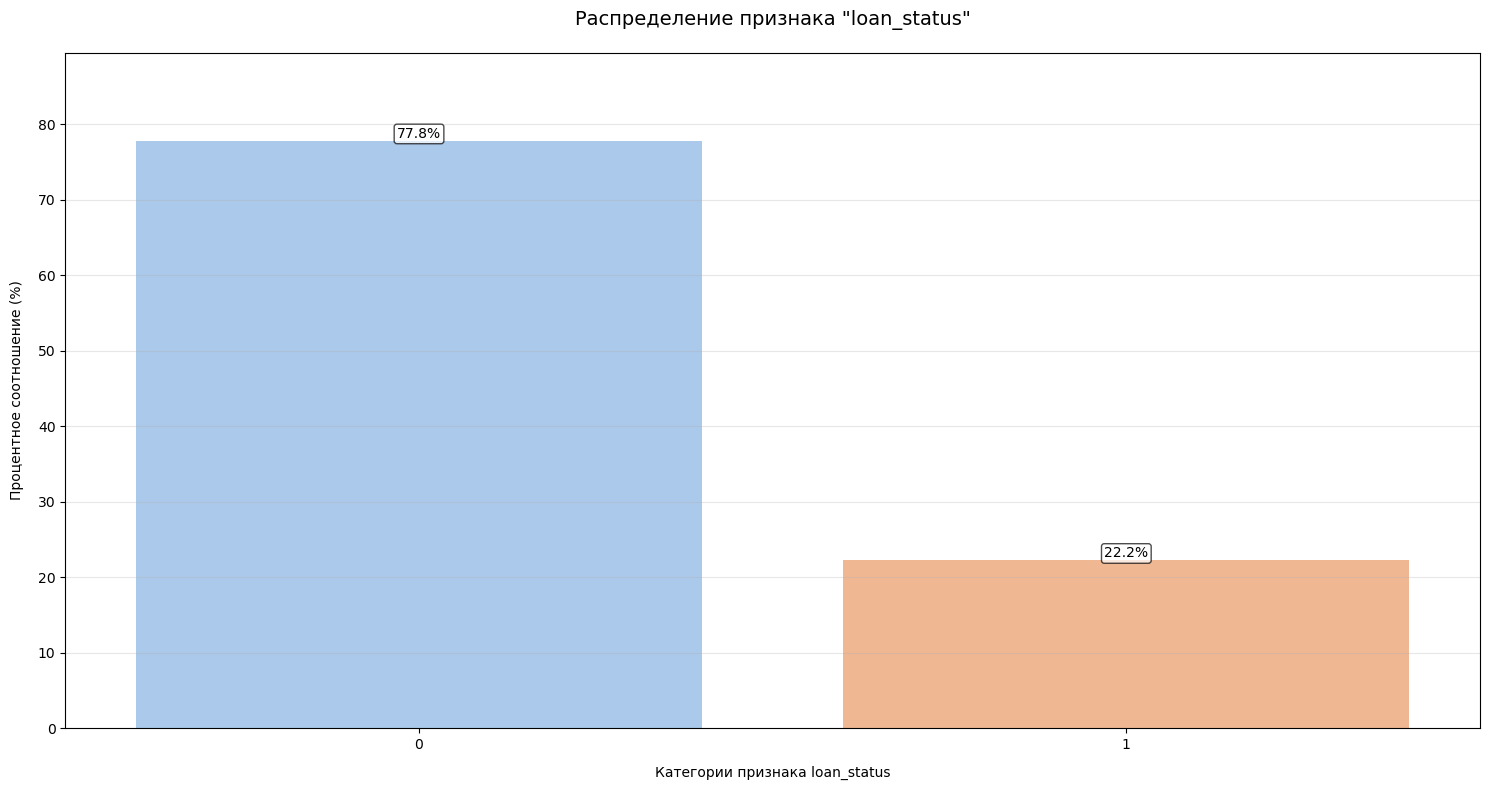

In [6]:
barplot_balance(df, 'loan_status')

Выявлен дизбаланс классов. Учтем это при моделировании

Посмотрим на некоторые признаки в разрезе целевой переменной:

### Person_age - возраст клиентов

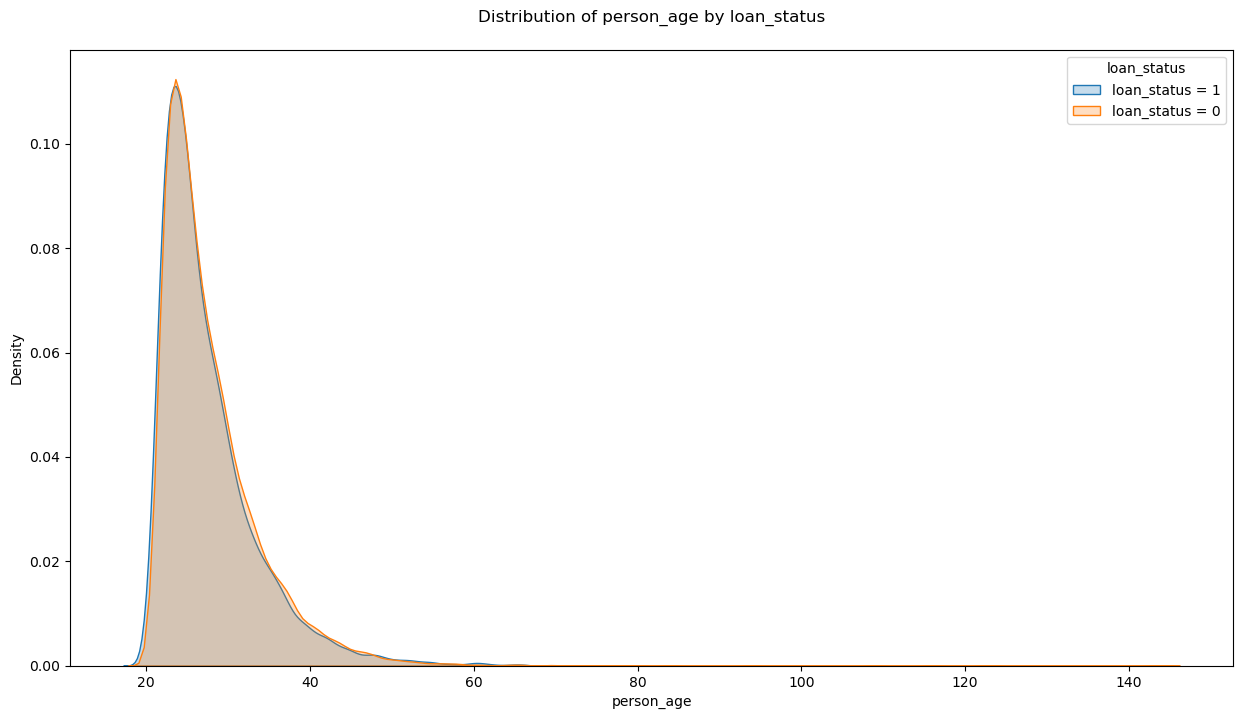

In [7]:
multiclass_kde_hue(df,'loan_status', 'person_age')

Возрастные клиенты не позволяют нам увидеть разницу в распределении возраста в разрезе целевой переменной. Рассмотрим только клиентов младше 50 лет, чтобы изучить наличие или отсутствие зависимости.

In [8]:
df_age_less_50 = df[df['person_age'] <= 50]

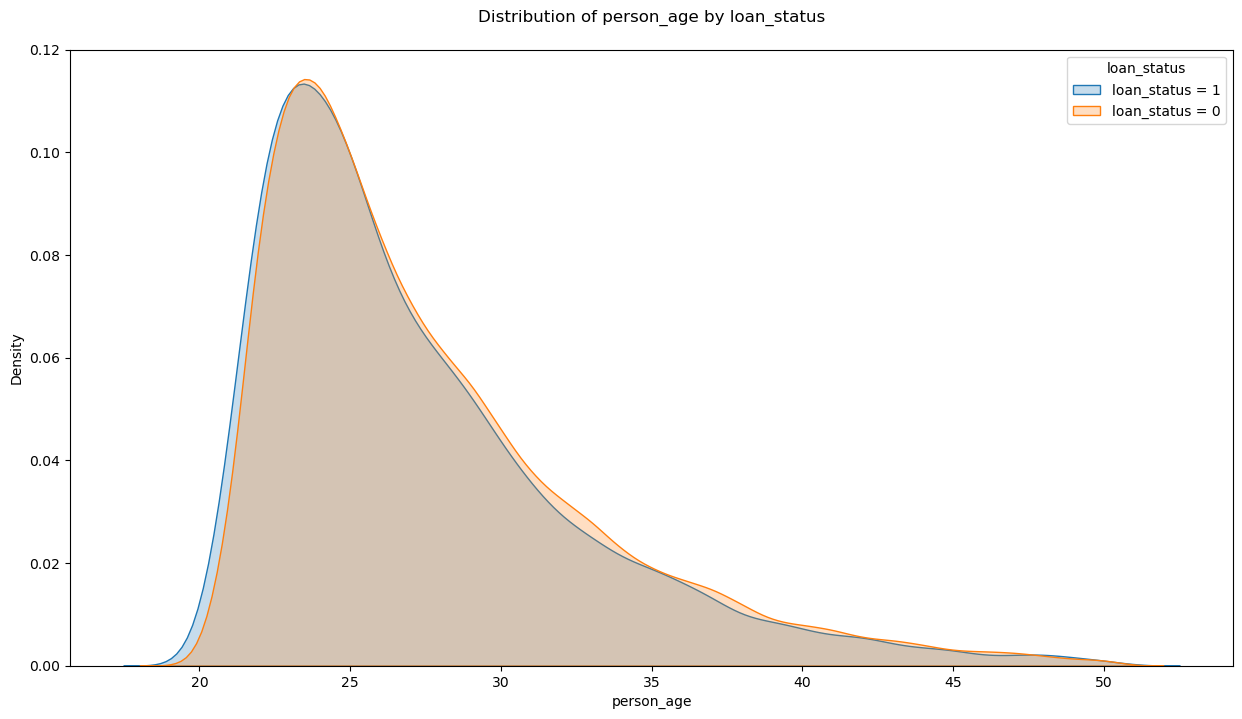

In [9]:
multiclass_kde_hue(df_age_less_50, 'loan_status', 'person_age')

Видно небольшое смещение в одобрении кредитов в сторону менее возрастных клиентов.

### Пол - person_gender 

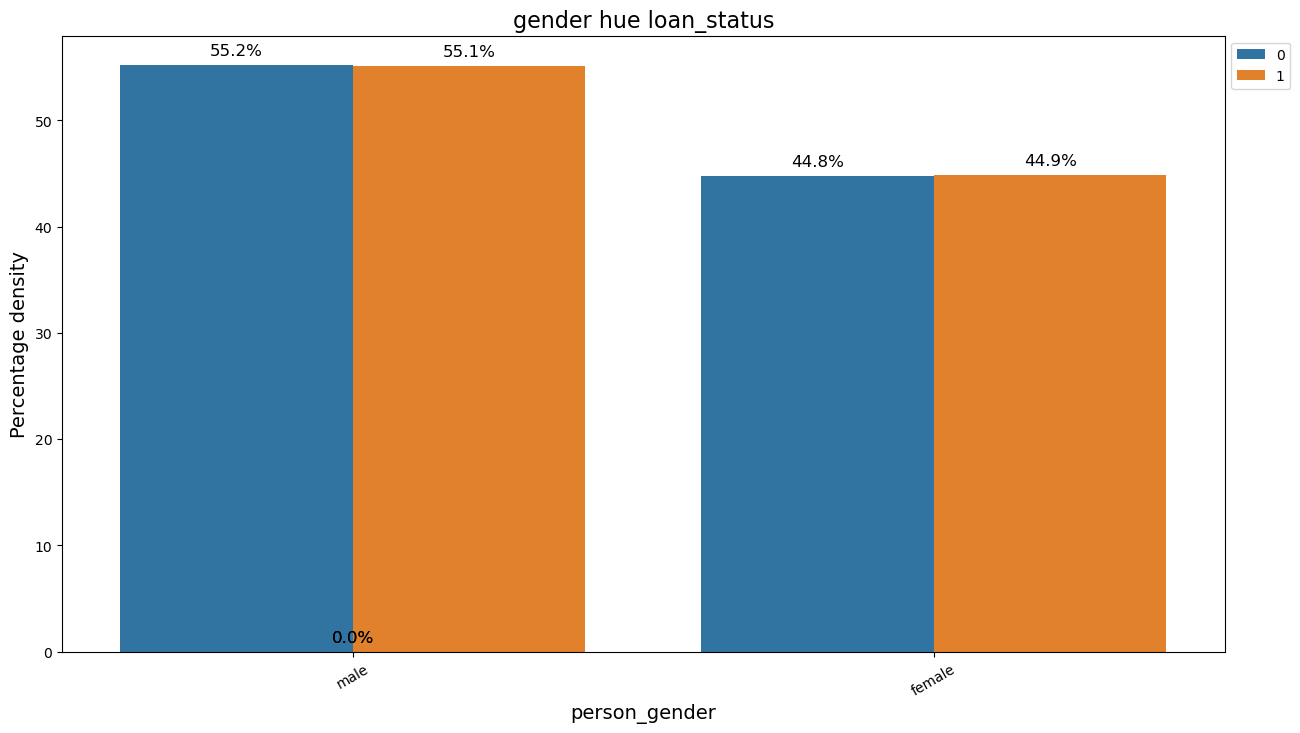

In [10]:
barplot_group(df, 'person_gender', 'loan_status', 'gender hue loan_status')

Зависимости от целевой переменной не выявлено

### Образование - person_education

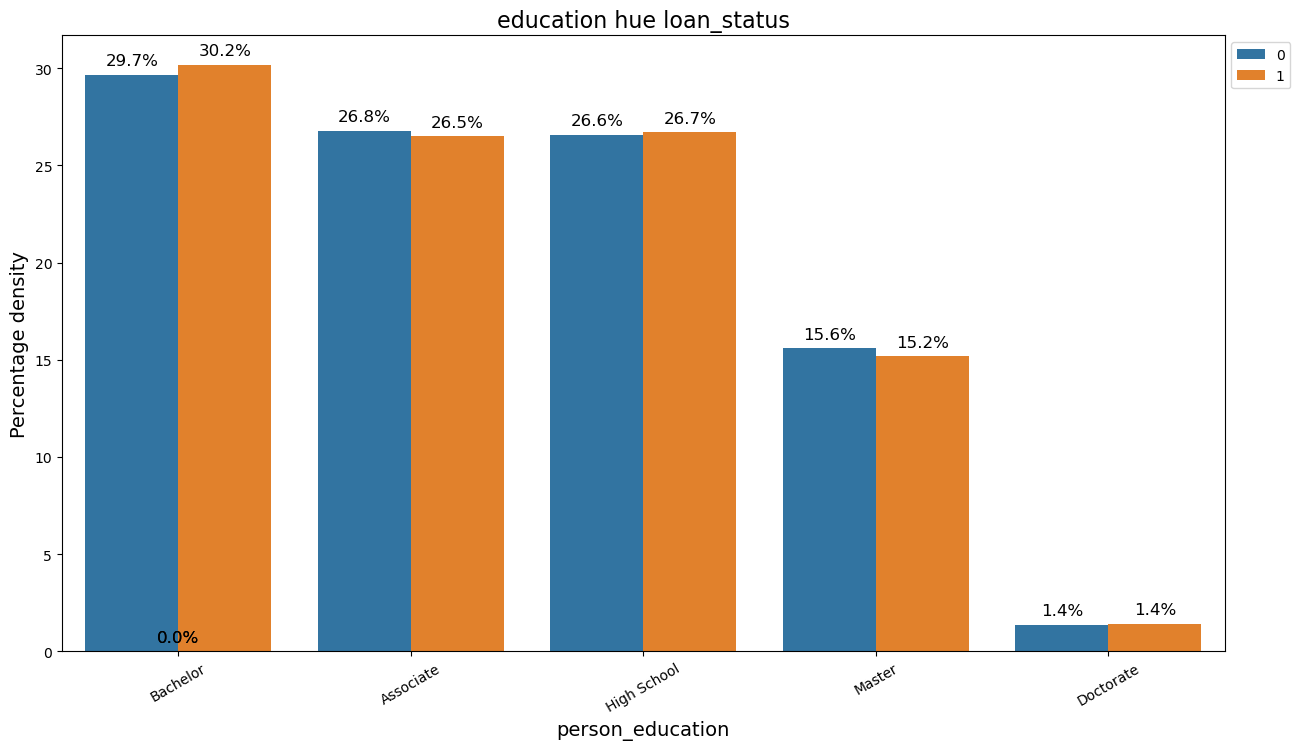

In [11]:
barplot_group(df, 'person_education', 'loan_status', 'education hue loan_status')

Дизбаланс выявлен у клиетов с образованием "Бакалавриат" и "Магистрарура"

### Доход - person_income

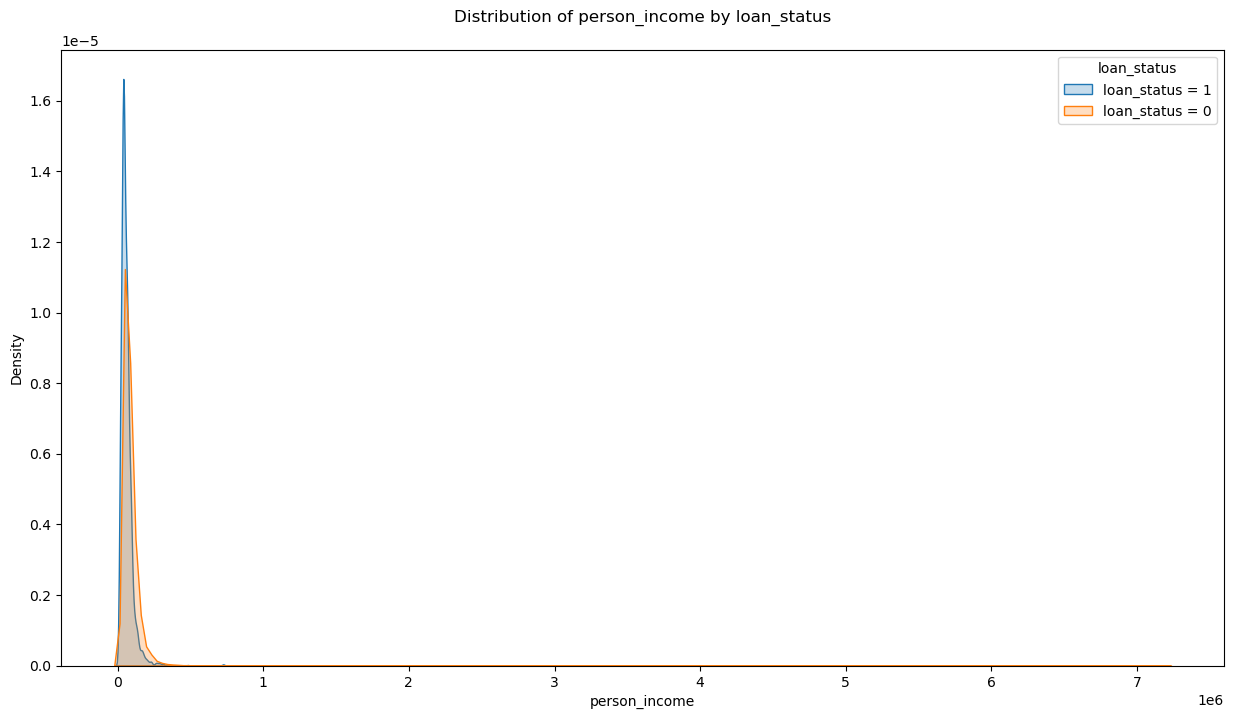

In [12]:
multiclass_kde_hue(df, 'loan_status', 'person_income')

In [13]:
df_log = df.copy()

In [14]:
df_log['log_income'] = np.log(df_log['person_income'])

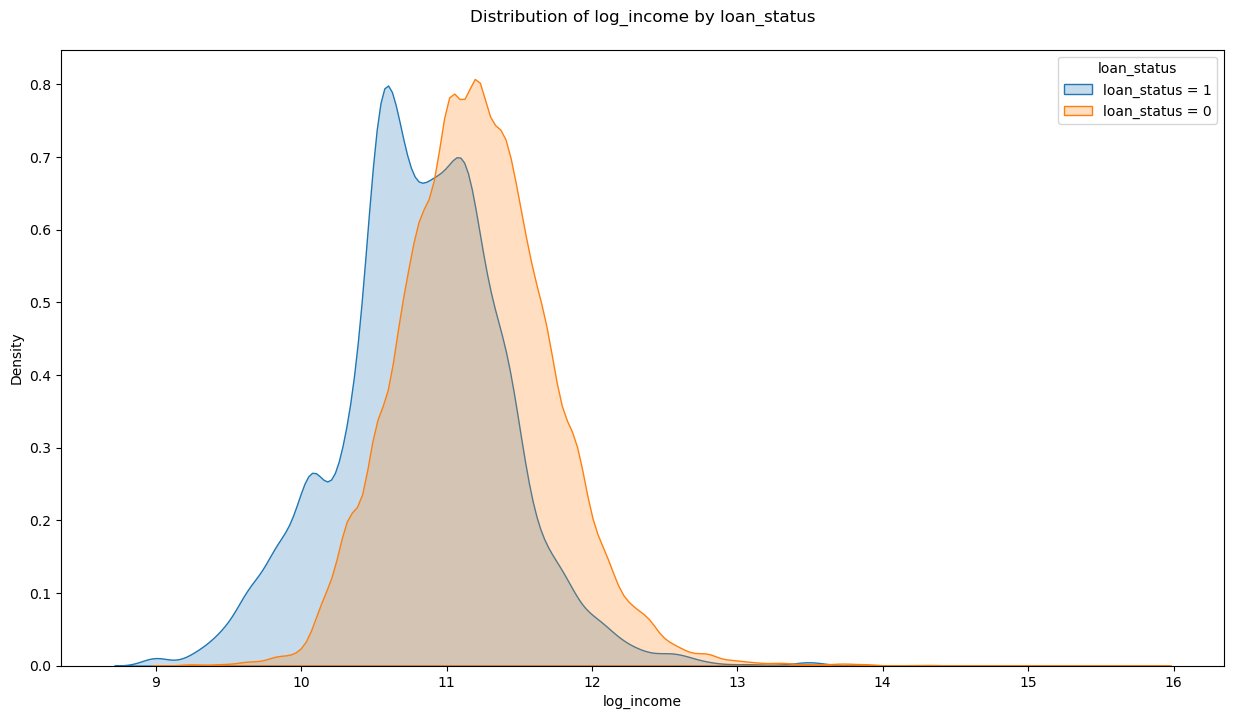

In [15]:
multiclass_kde_hue(df_log, 'loan_status', 'log_income')

Видно смещение в сторону менее обеспеченных клиентов (странно). Возможно это связано с размером кредита или отношением суммы кредита к доходу, либо целью кредита.

### Цель кредита - loan_intent

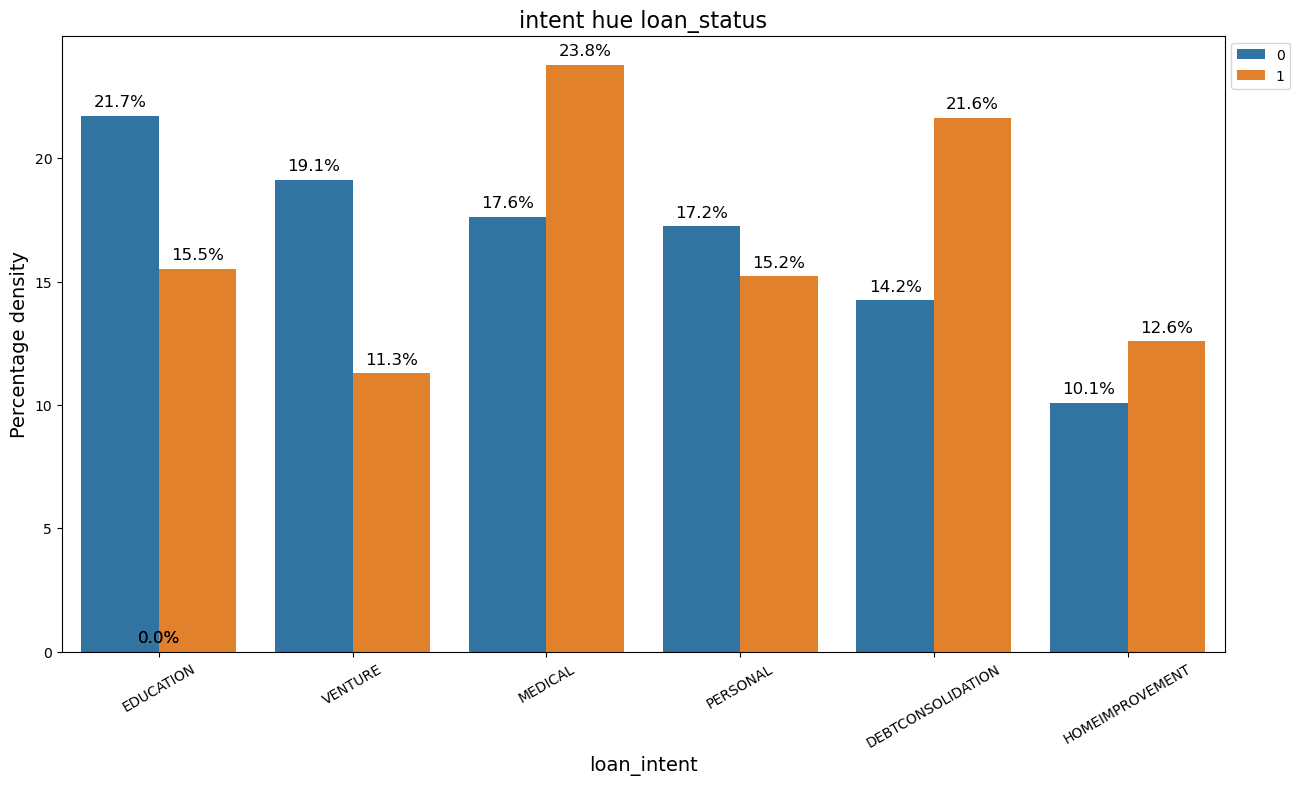

In [16]:
barplot_group(df, 'loan_intent', 'loan_status', 'intent hue loan_status')

Этот признак довольно показательный. Дизбаланс в сторону одобрения кредита наблюдается в консолидации долга, кредита на лечение и благоустройство дома.


Можно сделать вывод, что банк работет с частными лицами, у которых есть потенциал на повторное обращение. Видимо и заработок выше от работы с обычными людьми.

Возвращаясь к вопросу "почему одобрений больше среди менее обеспеченных клиентов?", на него можно ответить так: Чем дольше человек будет платить кредит, тем больше процентов он заплатит. Стратегия не очень надежная, но видимо работает.

### Опыт работы - person_emp_exp

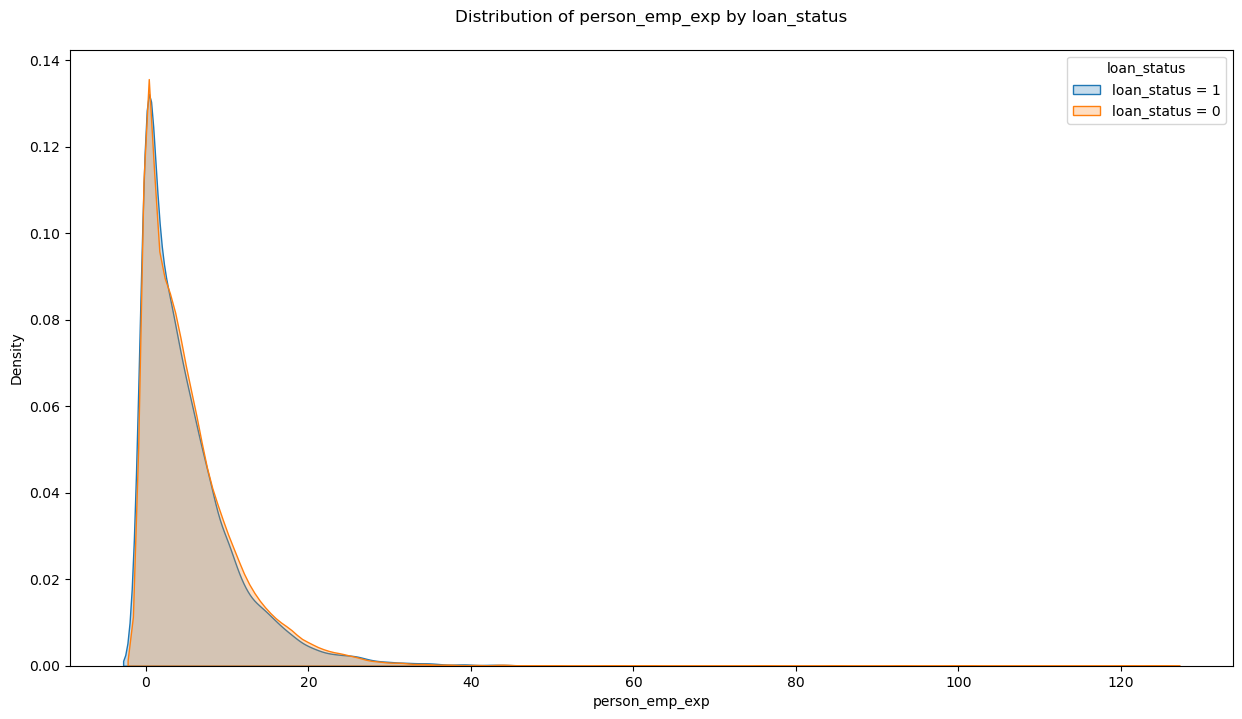

In [17]:
multiclass_kde_hue(df, 'loan_status', 'person_emp_exp')

In [18]:
df_log = df.copy()

In [19]:
df_log['person_emp_exp_log'] = np.log(df_log['person_emp_exp']+1)

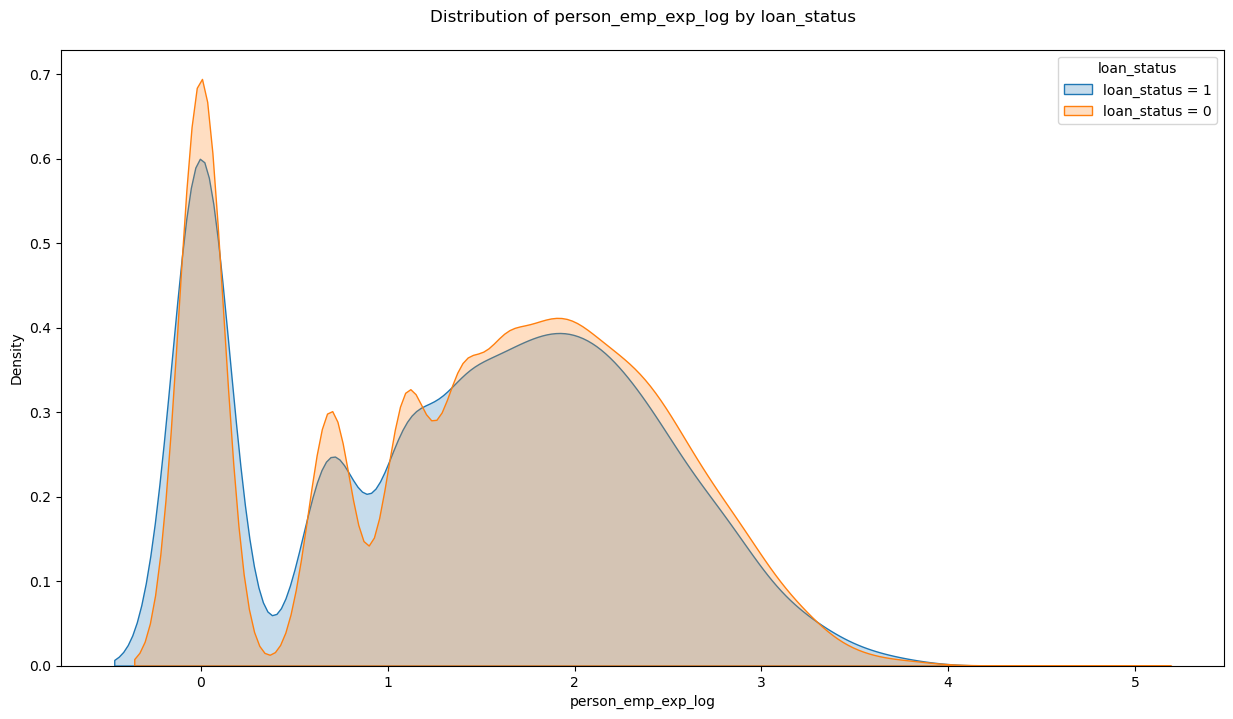

In [20]:
multiclass_kde_hue(df_log, 'loan_status', 'person_emp_exp_log')

Смешений не обнаружено, только разности в плотности распределения

### Размер кредита - loan_amnt

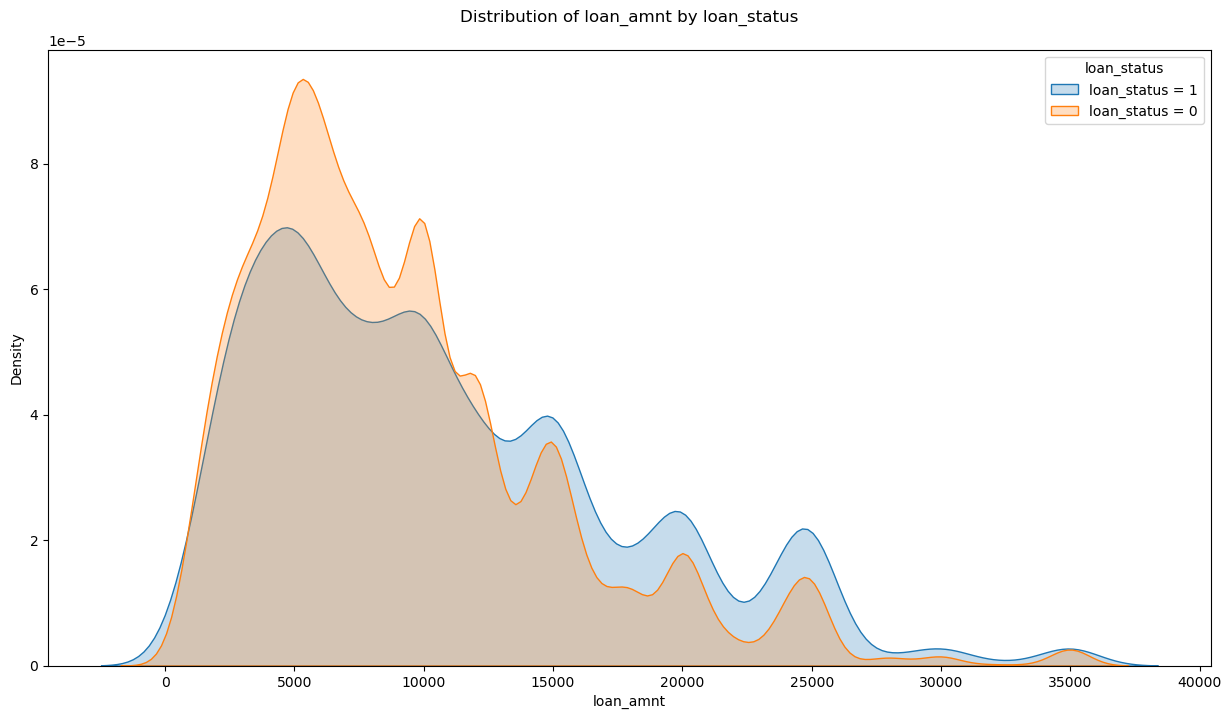

In [21]:
multiclass_kde_hue(df, 'loan_status', 'loan_amnt')

In [22]:
df_log = df.copy()

In [23]:
df_log['loan_amnt_log'] = np.log(df_log['loan_amnt'])

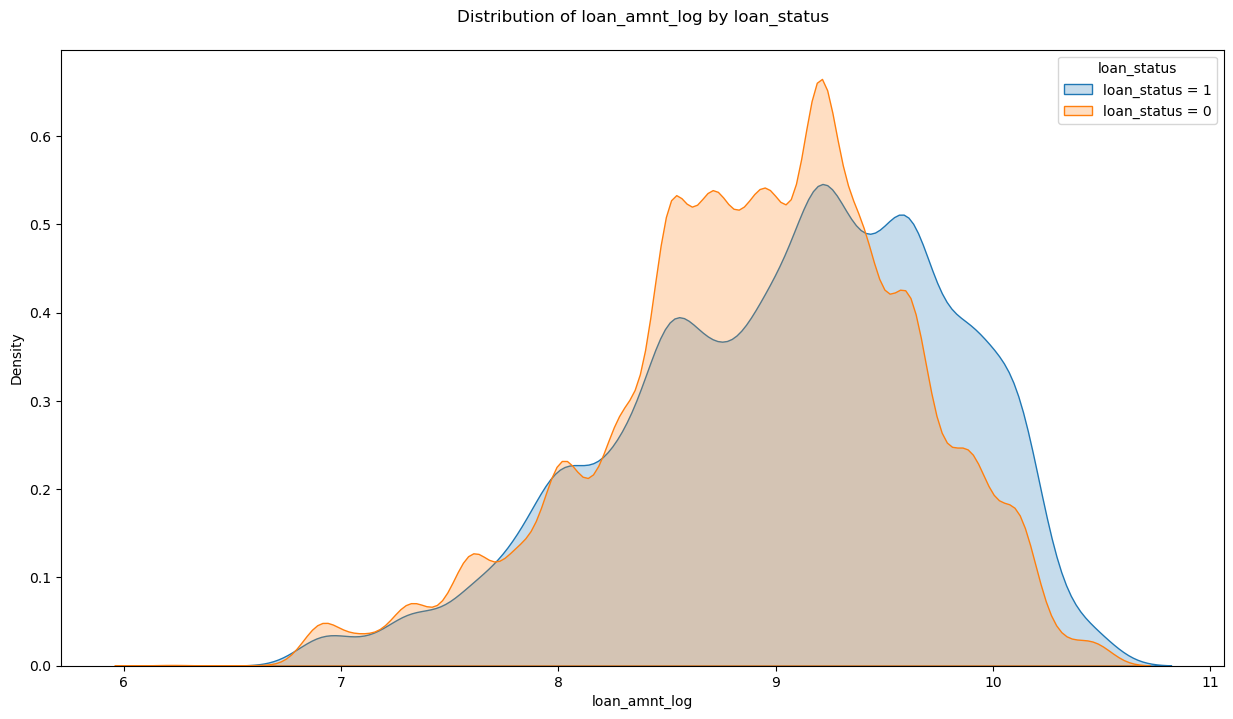

In [24]:
multiclass_kde_hue(df_log, 'loan_status', 'loan_amnt_log')

Зафиксировано смещение в сторону более высоких сумм кредита. Так же можно заметить, что клиентов, берущих меньшую сумму кредита, больше. Так же подтверждает теорию по клиентоориентированности в сторону частных лиц.

### Кредитный рейтинг - credit_score

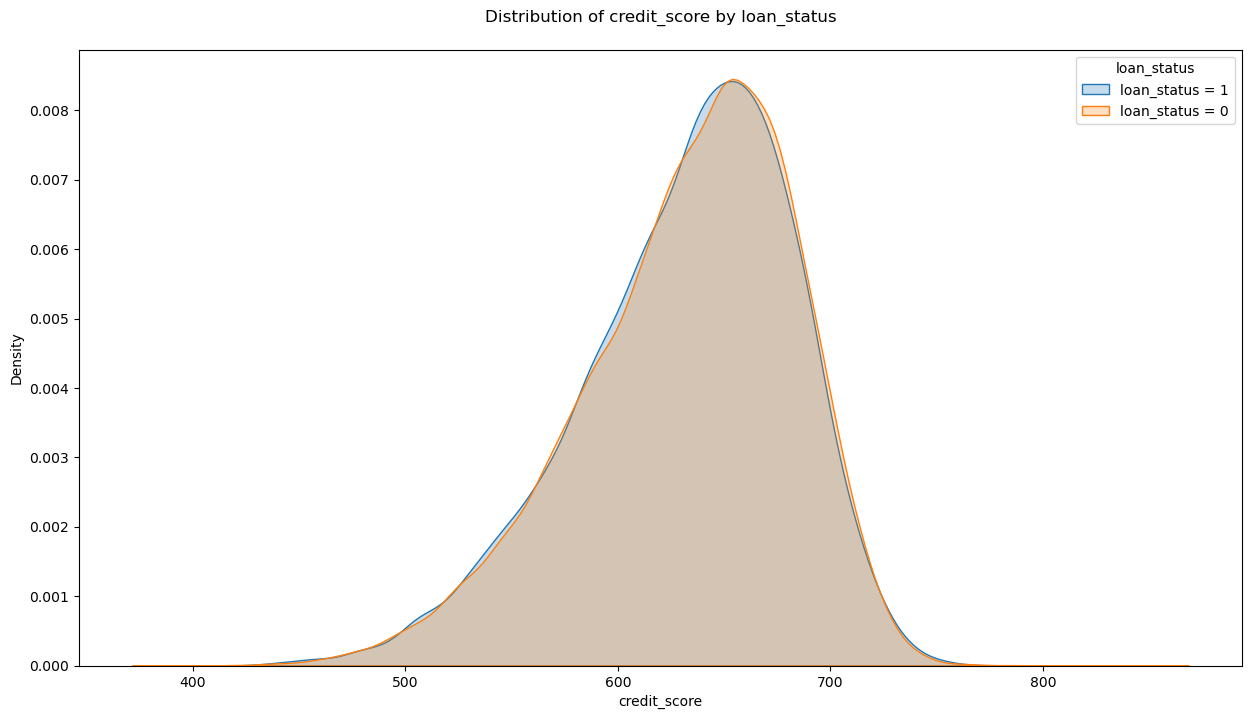

In [25]:
multiclass_kde_hue(df, 'loan_status', 'credit_score')

Удивительно, но кредитный рейтинг не влияет на выдачу кредита

### Статус жилья - person_home_ownership

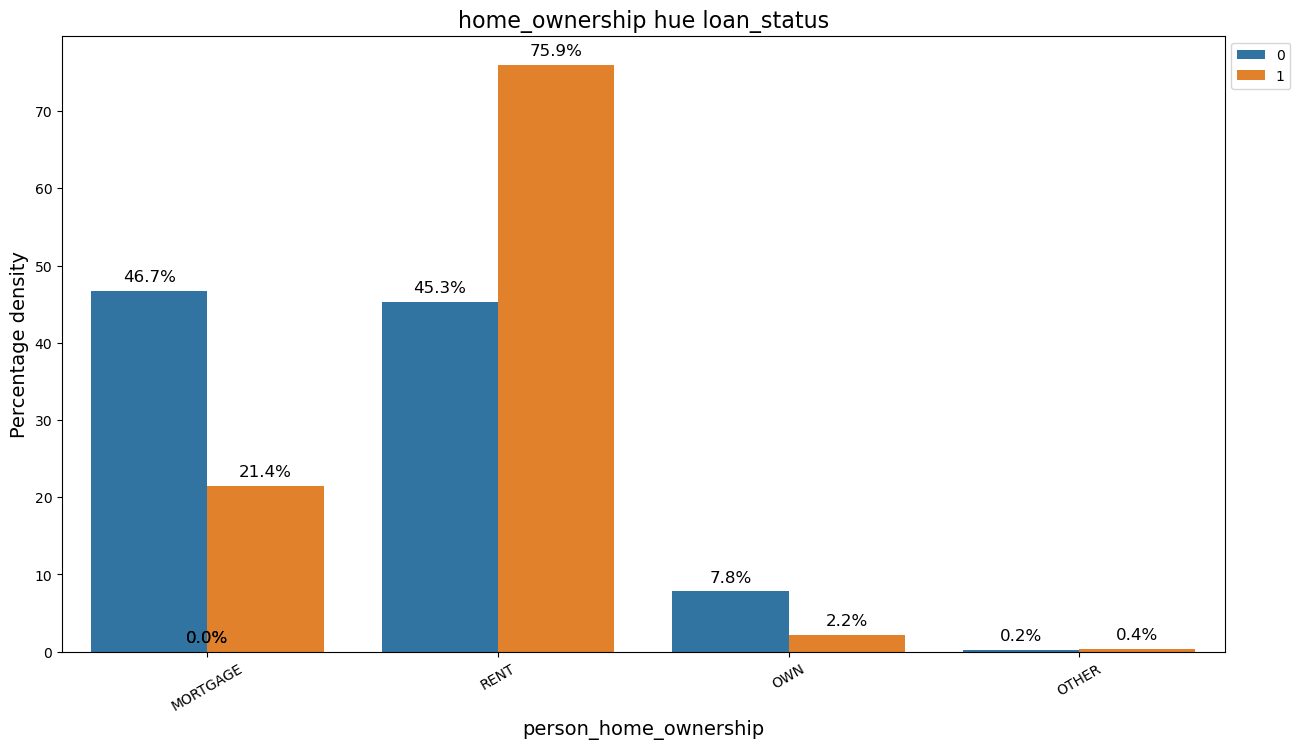

In [26]:
barplot_group(df, 'person_home_ownership', 'loan_status', 'home_ownership hue loan_status')

Людям с ипотекой и с собственным жильем кредиты выдают реже. В купе с тем, что распределение возраста клиентов показало ориентированноть на клиентов до 25 лет, у которых ещё нет кредитных обязательств и живущих на съемных квартирах.

### Наличие дефолта по кредиту - previous_loan_defaults_on_file

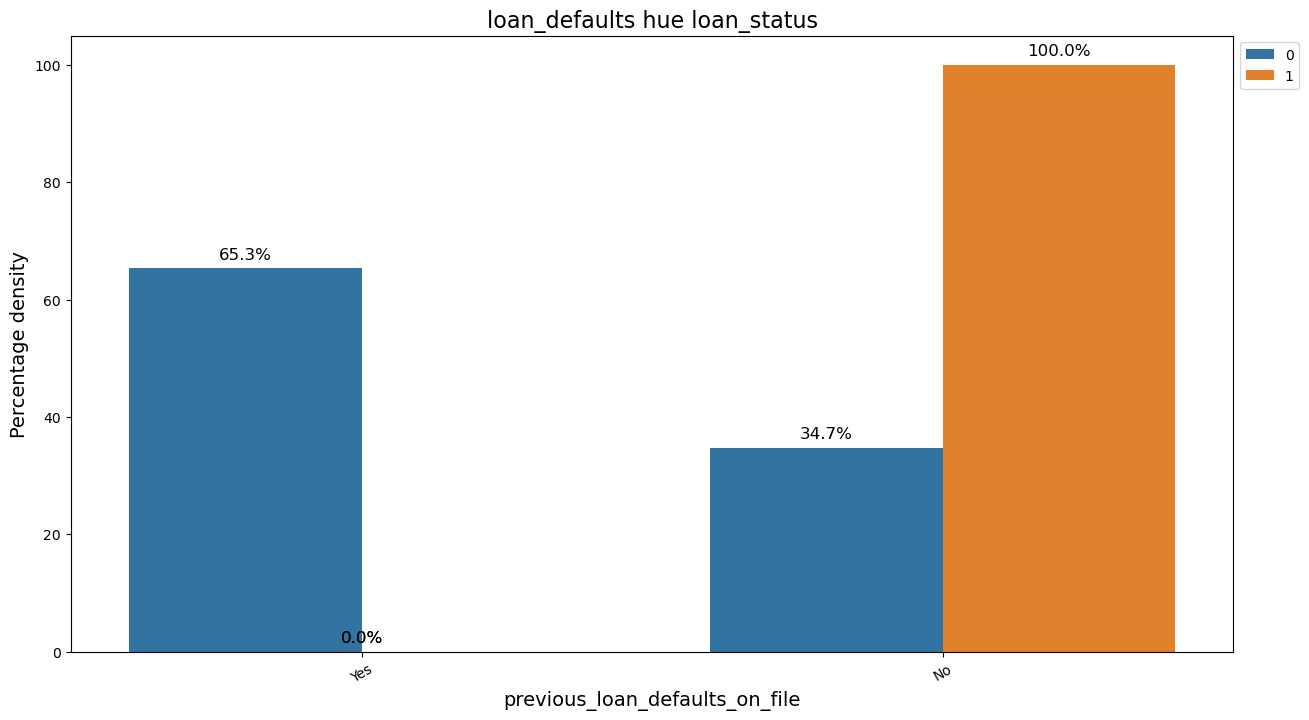

In [27]:
barplot_group(df, 'previous_loan_defaults_on_file', 'loan_status', 'loan_defaults hue loan_status')

Тут ситуация радикальная. Клиентам, у которых был дефолт по прошлым кредитам отказывают сразу. Видимо это нужно, чтобы обезопасить банк от молодых неплатежеспособныз клиентов. Также уменьшает риски в перспективе, так как было сказано ранее, банк надеется на максимально долгую выплату.

### Процентная ставка - loan_int_rate

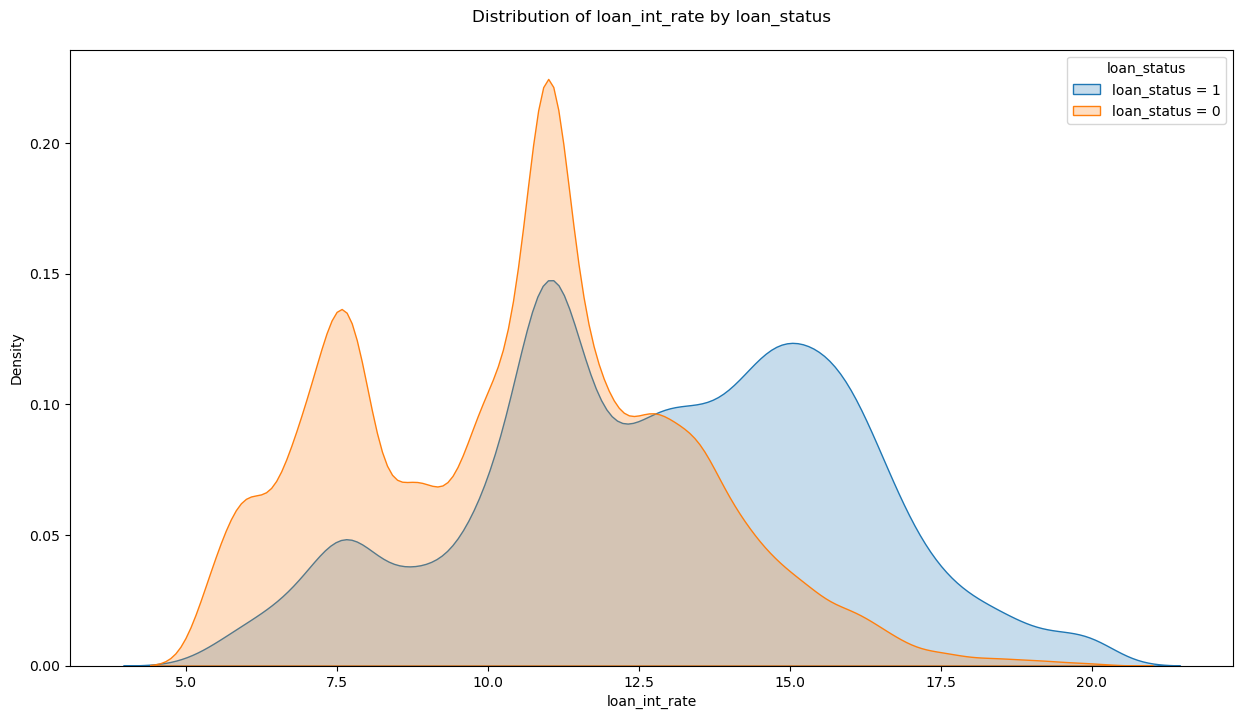

In [28]:
multiclass_kde_hue(df, 'loan_status', 'loan_int_rate')

Видно вмещение в сторону больших ставок по кредиту.

Обрежем хвост в распределении возраста, чтобы не было лика в данных и модель в будущем лучше обучилась.

In [29]:
df[(df['person_age'] > 65) & (df['loan_status'] == 0)].count()

person_age                        34
person_gender                     34
person_education                  34
person_income                     34
person_emp_exp                    34
person_home_ownership             34
loan_amnt                         34
loan_intent                       34
loan_int_rate                     34
loan_percent_income               34
cb_person_cred_hist_length        34
credit_score                      34
previous_loan_defaults_on_file    34
loan_status                       34
dtype: int64

In [30]:
df[(df['person_age'] > 65) & (df['loan_status'] == 1)].count()

person_age                        5
person_gender                     5
person_education                  5
person_income                     5
person_emp_exp                    5
person_home_ownership             5
loan_amnt                         5
loan_intent                       5
loan_int_rate                     5
loan_percent_income               5
cb_person_cred_hist_length        5
credit_score                      5
previous_loan_defaults_on_file    5
loan_status                       5
dtype: int64

Давать кредиты людям в почтенном возрасте идея изначально плохая, а в нашем исследовании они только помешают построить модель без лика в данных.

Людей старше 65 лет в датасете всего 39 с процентом одобрения кредита в 20%. Учитывая, что всего у нас 45000 данных, можно осключить этих клиентов из исследования.

In [31]:
df = df[df['person_age'] <= 65]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44961 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44961 non-null  float64
 1   person_gender                   44961 non-null  object 
 2   person_education                44961 non-null  object 
 3   person_income                   44961 non-null  float64
 4   person_emp_exp                  44961 non-null  int64  
 5   person_home_ownership           44961 non-null  object 
 6   loan_amnt                       44961 non-null  float64
 7   loan_intent                     44961 non-null  object 
 8   loan_int_rate                   44961 non-null  float64
 9   loan_percent_income             44961 non-null  float64
 10  cb_person_cred_hist_length      44961 non-null  float64
 11  credit_score                    44961 non-null  int64  
 12  previous_loan_defaults_on_file  44961

In [41]:
df_copy = df.copy()

In [42]:
object_columns = df_copy.select_dtypes(include=['object']).columns

In [43]:
dummies = pd.get_dummies(df_copy, drop_first=True)

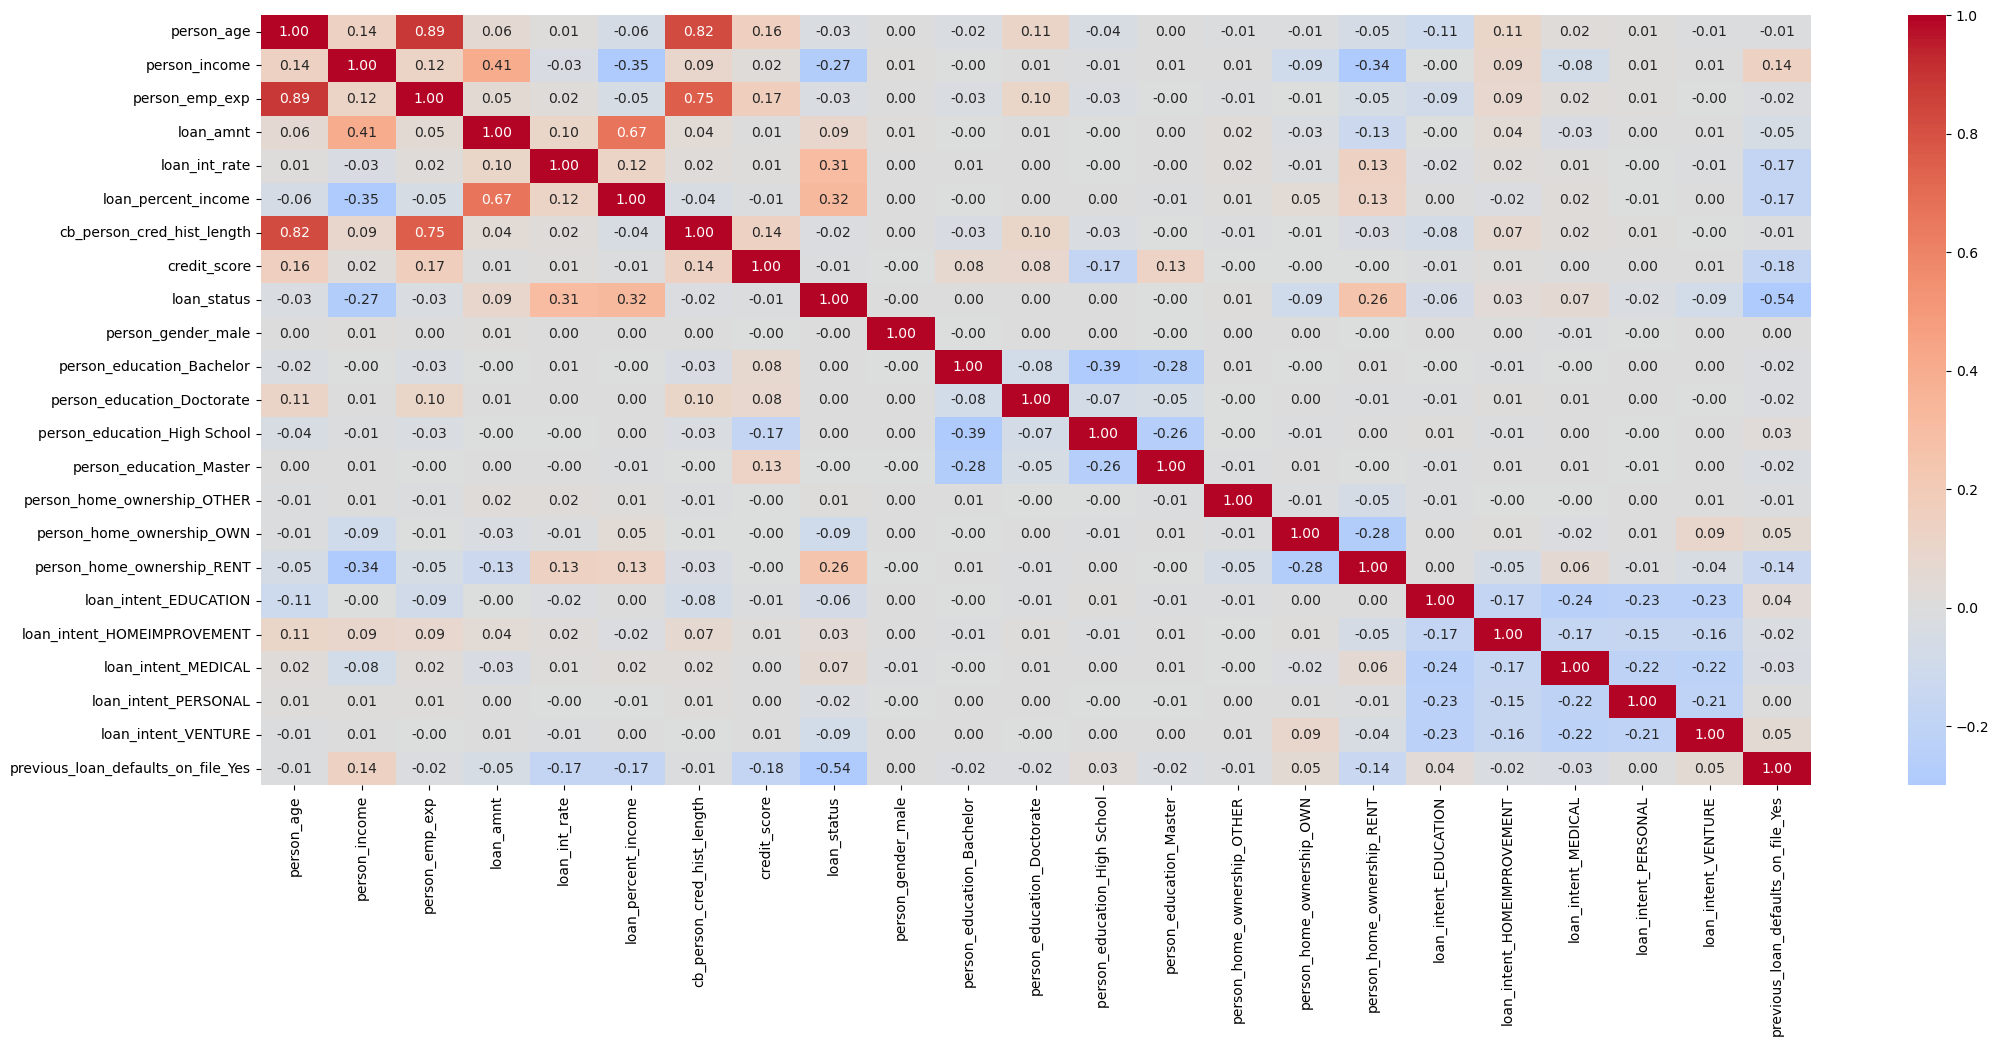

In [44]:
plt.figure(figsize=(25, 10))
sns.heatmap(dummies.corr(method='spearman'), annot=True, 
            fmt='.2f', vmin=-0.3, center=0, cmap='coolwarm')
plt.show()

Прямых корреляций с целевой переменной не обнаружено. Так же подтвердилась связь с признаками, которые исследовались графически.

In [45]:
df.to_csv('df_credit.csv', index=False)